In [1]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Commented part for Watson NoteBook data Reading Function ..
'''import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ff51983c050a4630b3166e6a1f3a6f19 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HmFw1PGy6e3r1YBZC-Gck4sBvCUCppiUOcNUqNpMNsqh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ff51983c050a4630b3166e6a1f3a6f19.get_object(Bucket='smartinternproject-donotdelete-pr-zpypzhtex4qlya',Key='traning_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body) '''

df = pd.read_csv('data_for_training.csv')
df.head()


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645904,5.659674,516.127569
4,380.650696,5.577941,491.702972


In [3]:
df[((df['Wind Speed (m/s)']<18)&(df['Wind Speed (m/s)']>14))&((df['Theoretical_Power_Curve (KWh)']<1500)&(df['Theoretical_Power_Curve (KWh)']>1000))]

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)


In [4]:
x = df.iloc[:,1:]
x.values

array([[   5.31133604,  416.3289078 ],
       [   5.67216682,  519.9175111 ],
       [   5.2160368 ,  390.9000158 ],
       ...,
       [   8.43535805, 1788.284755  ],
       [   9.42136574, 2418.382503  ],
       [   9.97933197, 2779.184096  ]])

In [5]:
y = df.iloc[:,0]
y.values

array([ 380.0477905,  453.7691956,  306.3765869, ..., 2201.106934 ,
       2515.694092 , 2820.466064 ])

In [6]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.12,random_state = 0)

In [7]:
regr = LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
score = regr.score(xtest, ytest)
score

0.9061943438444159

In [9]:
user_input = [[5,1800]]
result = regr.predict(user_input)
result[0]

1429.946846885841

In [10]:
ypred = regr.predict(xtest)

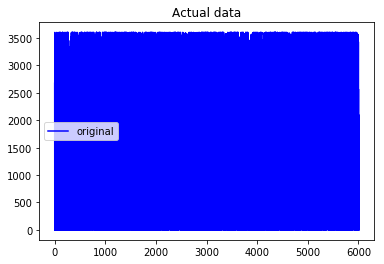

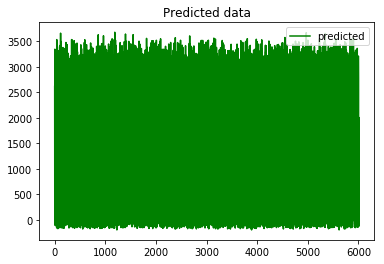

In [11]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original",color='blue')
plt.title("Actual data")
plt.legend()
plt.show()
x_ax1 = range(len(ypred))
plt.plot(x_ax1, ypred, label="predicted",color='green')
plt.title("Predicted data")
plt.legend()
plt.show()

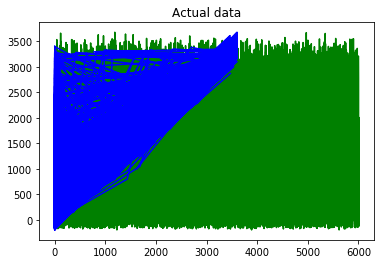

In [13]:
plt.plot(ypred,color='green')
plt.plot( ytest,ypred,color='blue')
plt.title("Actual data")
plt.show()

In [14]:
# xgboost algo ..

In [12]:
xgbr = xgb.XGBRegressor(gamma=0.10137883109108962, learning_rate=0.02, max_depth=2, min_child_weight=20, missing=float('nan'), n_estimators=707, n_jobs=2, random_state=33, reg_alpha=0.9575998867944943, silent=True, subsample=0.05498233327011234, verbosity=0)

In [13]:
data_dmatrix = xgb.DMatrix(data=x,label=y)
print(data_dmatrix)

In [14]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.10137883109108962, learning_rate=0.02,
       max_delta_step=0, max_depth=2, min_child_weight=20, missing=nan,
       n_estimators=707, n_jobs=2, nthread=None, objective='reg:linear',
       random_state=33, reg_alpha=0.9575998867944943, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.05498233327011234, verbosity=0)

In [15]:
score1 = xgbr.score(xtest, ytest)
score1

0.9123978263500201

In [17]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.91


In [18]:
preds_y = xgbr.predict(xtest)
preds_y

array([2409.4304  ,  669.2664  ,   13.781533, ..., 1861.9197  ,
         13.781533,   13.781533], dtype=float32)

In [25]:
series = {
    'Wind Speed (m/s)':[25,5],
    'Theoretical_Power_Curve (KWh)':[4203,423]
}
names = xgbr.get_booster().feature_names
vector = pd.DataFrame(series)
result1 = xgbr.predict(vector[names].iloc[[-1]])
result1

array([261.15018], dtype=float32)

In [27]:
xtest.shape
type(xtest)

pandas.core.frame.DataFrame

In [36]:
series = {
    'Wind Speed (m/s)': [25,5],
    'Theoretical_Power_Curve (KWh)': [4203,423]
}
vector = pd.DataFrame(series)
new_result = xgbr.predict(vector)
print(list(new_result))

[3547.6875, 261.15018]


In [21]:
## save model

In [22]:
from sklearn.externals import joblib 
series = {
    'Wind Speed (m/s)':[20],
    'Theoretical_Power_Curve (KWh)':[4160]
}
# Save the model as a pickle in a file 
joblib.dump(xgbr, 'filename.pkl') 
# Load the model from the file 
with open("filename.pkl","rb") as file:
    model=joblib.load(file) 
vector = pd.DataFrame(series)
# Use the loaded model to make predictions 
rs = model.predict(vector[names].iloc[[-1]])
file.close()
rs


array([3547.6875], dtype=float32)

In [23]:
from sklearn.externals import joblib 
series = {
    'Wind Speed (m/s)':[20],
    'Theoretical_Power_Curve (KWh)':[4106]
}
joblib.dump(xgbr, 'filename.pkl') 
vector = pd.DataFrame(series)
rsu = model.predict(vector[names].iloc[[-1]])
rsu

array([3547.6875], dtype=float32)

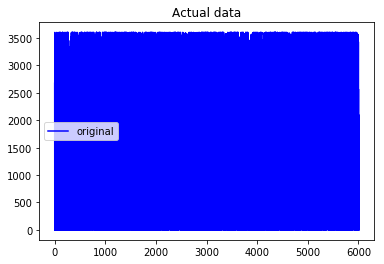

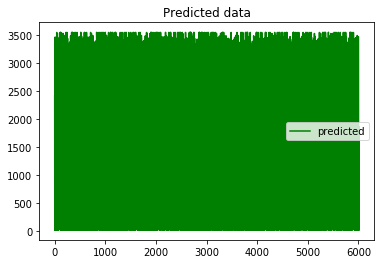

In [89]:
x_ax3 = range(len(ytest))
plt.plot(x_ax3, ytest, label="original",color='blue')
plt.title("Actual data")
plt.legend()
plt.show()
x_ax4 = range(len(preds_y))
plt.plot(x_ax4, preds_y, label="predicted",color='green')
plt.title("Predicted data")
plt.legend()
plt.show()

#  So , In conclusion "xgboost" algorithem works well and that is our final Model :)
